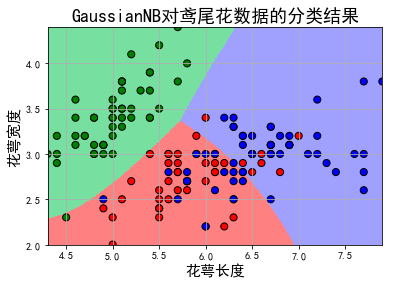

准确率:78.00%


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB,MultinomialNB

def iris_type(s):
    it = {b'Iris-setosa':0,b'Iris-versicolor':1,b'Iris-virginica':2}
    return it[s]

data = np.loadtxt(r'C:\Users\yy\data\8.iris.txt',dtype=float,delimiter=',',converters={4:iris_type})
x,y = np.split(data,(4,),axis=1)
x = x[:,:2]
y = y.ravel()

sc = StandardScaler()
sc.fit_transform(x,y)
gnb = GaussianNB()
gnb.fit(x,y)

x1_min,x1_max = x[:,0].min(),x[:,0].max()
x2_min,x2_max = x[:,1].min(),x[:,1].max()
x1,x2 = np.mgrid[x1_min:x1_max:500j,x2_min:x2_max:500j]
grid_test = np.stack((x1.flat,x2.flat),axis=1)

mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

grid_hat = gnb.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
plt.figure(facecolor='w')
plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light)
plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k',s=50,cmap=cm_dark)
plt.xlabel(u'花萼长度',fontsize=15)
plt.ylabel(u'花萼宽度',fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title(u'GaussianNB对鸢尾花数据的分类结果',fontsize=18)
plt.grid(True)
plt.show()

y_hat = gnb.predict(x)
result = y_hat == y
acc = np.mean(result)
print('准确率:%.2f%%' % (100 * acc))

In [10]:
#特征越多，multinomialnb的效果越好
from sklearn.naive_bayes import GaussianNB,MultinomialNB
np.random.seed(0)
m = 20
n = 50
x = np.random.randint(2,size=(m,n))
x = np.array(list(set([tuple(i) for i in x])))
M = len(x)
y = np.arange(M)
mnb = MultinomialNB(alpha=1)
#gnb = GaussianNB()
mnb.fit(x,y)
#gnb.fit(x,y)
y_hat = mnb.predict(x)
#y_hat = gnb.predict(x)
print('得分：',mnb.score(x,y))

得分： 1.0


In [1]:
#文本分类
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from time import time
import matplotlib.pyplot as plt
import matplotlib as mpl

categories = 'alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space'
data_train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True,random_state=0)
data_test = fetch_20newsgroups(subset='test',categories=categories,shuffle=True,random_state=0)
print('训练集包含的文本数目:',len(data_train.data))
print('测试集包含的文本数目:',len(data_test.data))
print(data_train.data[0])

训练集包含的文本数目: 2034
测试集包含的文本数目: 1353
From: healta@saturn.wwc.edu (Tammy R Healy)
Subject: Re: note to Bobby M.
Lines: 52
Organization: Walla Walla College
Lines: 52

In article <1993Apr14.190904.21222@daffy.cs.wisc.edu> mccullou@snake2.cs.wisc.edu (Mark McCullough) writes:
>From: mccullou@snake2.cs.wisc.edu (Mark McCullough)
>Subject: Re: note to Bobby M.
>Date: Wed, 14 Apr 1993 19:09:04 GMT
>In article <1993Apr14.131548.15938@monu6.cc.monash.edu.au> darice@yoyo.cc.monash.edu.au (Fred Rice) writes:
>>In <madhausC5CKIp.21H@netcom.com> madhaus@netcom.com (Maddi Hausmann) writes:
>>
>>>Mark, how much do you *REALLY* know about vegetarian diets?
>>>The problem is not "some" B-vitamins, it's balancing proteins.  
>>>There is also one vitamin that cannot be obtained from non-animal
>>>products, and this is only of concern to VEGANS, who eat no
>>>meat, dairy, or eggs.  I believe it is B12, and it is the only
>>>problem.  Supplements are available for vegans; yes, the B12
>>>does come from anima

训练集样本个数：2034,特征个数:33809


分类器的比较：

分类器: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
单次训练时间为: 0.032秒
最优超参数为: {'alpha': 0.003593813663804626}
训练时间为: -0.003秒
测试集准确率: 89.58%


分类器: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
单次训练时间为: 0.048秒
最优超参数为: {'alpha': 0.001}
训练时间为: -0.010秒
测试集准确率: 88.54%


分类器: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
单次训练时间为: 0.314秒
最优超参数为: {'n_neighbors': 3}
训练时间为: -0.206秒
测试集准确率: 86.03%


分类器: RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
单次训练时间为: 0.578秒
最优超参数为: {'alpha': 0.046415888336127795}
训练时间为: -0.004秒
测试集准确率: 89.73%


分类器: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
 

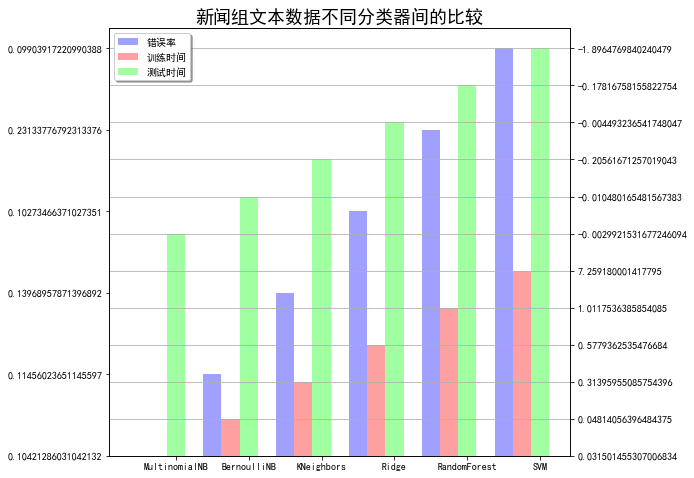

In [17]:
def test_clf(clf):
    print(u'分类器:',clf)
    model = GridSearchCV(clf,param_grid={},cv=5)
    if hasattr(clf,'alpha'):
        alpha_can = np.logspace(-3,2,10)
        model.set_params(param_grid={'alpha':alpha_can})
        m = alpha_can.size
    if hasattr(clf,'n_neighbors'):
        neighbors_can = np.arange(1,15)
        model.set_params(param_grid={'n_neighbors':neighbors_can})
        m = neighbors_can.size
    if hasattr(clf,'C'):
        C_can = np.logspace(-1,2,4)
        gamma_can = np.logspace(-2,0,3)
        model.set_params(param_grid={'C':C_can,'gamma':gamma_can})
        m = C_can.size * gamma_can.size
    if hasattr(clf,'max_depth'):
        max_depth_can = np.arange(4,10)
        model.set_params(param_grid={'max_depth':max_depth_can})
        m = max_depth_can.size
    t_start = time()
    model.fit(x_train,y_train)
    t_end = time()
    t_train = (t_end - t_start) / (5*m)   #单次训练时间
    print('单次训练时间为: %.3f秒' % t_train)
    print('最优超参数为:',model.best_params_)
    
    t_start = time()
    y_hat = model.predict(x_test)
    t_end = time()
    t_test = t_end - t_start
    acc = metrics.accuracy_score(y_test,y_hat)
    print('训练时间为: %.3f秒' % t_test)
    print('测试集准确率: %.2f%%' % (100 * acc))
    
    #简化分类器名字（用于可视化）
    name = str(clf).split('(')[0]
    index = name.find('Classifier')
    if index != -1:
        name = name[:index]  #去电末尾的Classifier
    if name == 'SVC':
        name = 'SVM'
    
    return t_train,t_test,1-acc,name


y_train = data_train.target
y_test = data_test.target

vectorizer = TfidfVectorizer(input='content',stop_words='english',max_df=0.5,sublinear_tf=True)
x_train = vectorizer.fit_transform(data_train.data)
x_test = vectorizer.transform(data_test.data)

print(u'训练集样本个数：%d,特征个数:%d' % x_train.shape)
feature_names = np.asarray(vectorizer.get_feature_names())

print('\n\n=====================\n分类器的比较：\n')
clfs = (MultinomialNB(),BernoulliNB(),KNeighborsClassifier(),RidgeClassifier(),
       RandomForestClassifier(n_estimators=200),SVC())
result = []
for clf in clfs:
    a = test_clf(clf)
    result.append(a)
    print('\n')

result = np.array(result)
time_train,time_test,err,names = result.T
x = np.arange(len(time_train))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,7),facecolor='w')
ax = plt.axes()
b1 = ax.bar(x,err,width=0.25,color='#A0A0FF')
ax_t = ax.twinx()
b2 = ax_t.bar(x+0.25,time_train,width=0.25,color='#FFA0A0')
b3 = ax_t.bar(x+0.5,time_test,width=0.25,color='#A0FFA0')
plt.xticks(x+0.5,names,fontsize=10)
leg = plt.legend([b1[0],b2[0],b3[0]],(u'错误率',u'训练时间',u'测试时间'),loc='upper left',shadow=True)
plt.title(u'新闻组文本数据不同分类器间的比较',fontsize=18)
plt.xlabel(u'分类器名称')
plt.grid()
plt.tight_layout(2)
plt.show()

<font size=5 face='黑体'>英文电影评论情感分析

In [1]:
import os

imdb_dir = r'D:\aclImdb_v1\aclImdb'
train_dir = os.path.join(imdb_dir,'train')
test_dir = os.path.join(imdb_dir,'test')

train_labels = []
test_labels = []
train_texts = []
test_texts = []

for label_type in ['neg','pos']:
    dir_name_train = os.path.join(train_dir,label_type)
    for fname in os.listdir(dir_name_train):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name_train,fname),'r',encoding='utf8') as fp:
                train_texts.append(fp.read())
            if label_type == 'neg':
                train_labels.append(0)
            else:
                train_labels.append(1)
    dir_name_test = os.path.join(test_dir,label_type)
    for fname in os.listdir(dir_name_test):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name_test,fname),'r',encoding='utf8') as fp:
                test_texts.append(fp.read())
            if label_type == 'neg':
                test_labels.append(0)
            else:
                test_labels.append(1)
                
print(train_texts[0])
print(train_labels[:10])

Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [2]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from time import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


def test_clf(clf):
    print(u'分类器:',clf)
    model = GridSearchCV(clf,param_grid={},cv=5)
    if hasattr(clf,'alpha'):
        alpha_can = np.logspace(-1,2,15)
        model.set_params(param_grid={'alpha':alpha_can})
        m = alpha_can.size
    if hasattr(clf,'n_neighbors'):
        neighbors_can = np.arange(11,15)
        model.set_params(param_grid={'n_neighbors':neighbors_can})
        m = neighbors_can.size
    if hasattr(clf,'max_depth'):
        max_depth_can = np.arange(6,10)
        model.set_params(param_grid={'max_depth':max_depth_can})
        m = max_depth_can.size
    t_start = time()
    model.fit(x_train,y_train)
    t_end = time()
    t_train = (t_end - t_start) / (5*m)   #单次训练时间
    print('单次训练时间为: %.3f秒' % t_train)
    print('最优超参数为:',model.best_params_)
    
    t_start = time()
    y_hat = model.predict(x_test)
    t_end = time()
    t_test = t_end - t_start
    acc = metrics.accuracy_score(y_test,y_hat)
    print('测试时间为: %.3f秒' % t_test)
    print('测试集准确率: %.2f%%' % (100 * acc))
    
    #简化分类器名字（用于可视化）
    name = str(clf).split('(')[0]
    index = name.find('Classifier')
    if index != -1:
        name = name[:index]  #去电末尾的Classifier
    
    return t_train,t_test,1-acc,name



vectorizer = TfidfVectorizer(input='content',stop_words='english',max_df=0.5,sublinear_tf=True)
x_train = vectorizer.fit_transform(train_texts)
x_test = vectorizer.transform(test_texts)

y_train = train_labels
y_test = test_labels

print(u'训练集样本个数：%d,特征个数:%d' % x_train.shape)
feature_names = np.asarray(vectorizer.get_feature_names())

print('\n\n=====================\n分类器的比较：\n')
clfs = (MultinomialNB(),BernoulliNB(),KNeighborsClassifier(),RidgeClassifier(),
       RandomForestClassifier(n_estimators=400))
result = []
for clf in clfs:
    a = test_clf(clf)
    result.append(a)
    print('\n')

result = np.array(result)
time_train,time_test,err,names = result.T
x = np.arange(len(time_train))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,7),facecolor='w')
ax = plt.axes()
b1 = ax.bar(x,err,width=0.3,color='#A0A0FF')
ax_t = ax.twinx()
b2 = ax_t.bar(x+0.3,time_train,width=0.3,color='#FFA0A0')
b3 = ax_t.bar(x+0.6,time_test,width=0.3,color='#A0FFA0')
plt.xticks(x+0.3,names,fontsize=12)
leg = plt.legend([b1[0],b2[0],b3[0]],(u'错误率',u'训练时间',u'测试时间'),loc='upper left',shadow=True)
plt.title(u'电影评论情感分析不同模型间的比较',fontsize=18)
plt.xlabel(u'模型名称')
plt.grid()
plt.tight_layout(2)
plt.show()

训练集样本个数：25000,特征个数:74535


分类器的比较：

分类器: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
单次训练时间为: 0.206秒
最优超参数为: {'alpha': 13.894954943731374}
测试时间为: 0.033秒
测试集准确率: 84.54%


分类器: BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
单次训练时间为: 0.370秒
最优超参数为: {'alpha': 8.483428982440717}
测试时间为: 0.149秒
测试集准确率: 81.42%


分类器: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
单次训练时间为: 49.486秒
最优超参数为: {'n_neighbors': 13}
测试时间为: 52.228秒
测试集准确率: 73.48%


分类器: RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
单次训练时间为: 1.687秒
最优超参数为: {'alpha': 8.483428982440717}
测试时间为: 0.018秒
测试集准确率: 88.32%


分类器: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=

<Figure size 1000x700 with 2 Axes>

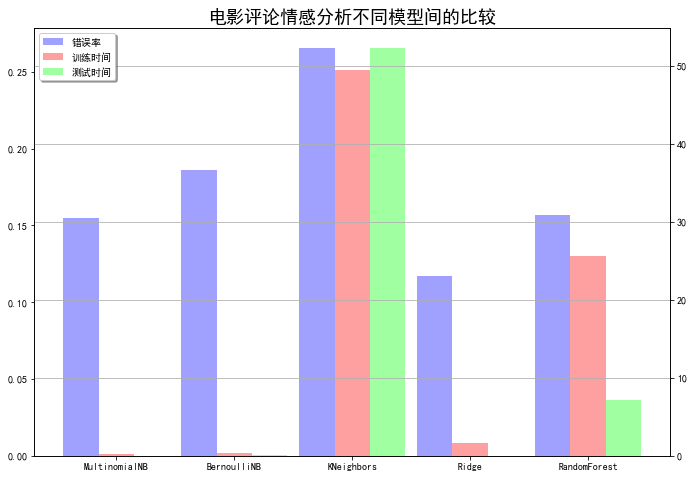

In [14]:
err = err.astype(np.float)
time_train = time_train.astype(np.float)
time_test = time_test.astype(np.float)
x = np.arange(len(time_train))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,7),facecolor='w')
ax = plt.axes()
b1 = ax.bar(x,err,width=0.3,color='#A0A0FF')
ax_t = ax.twinx()
b2 = ax_t.bar(x+0.3,time_train,width=0.3,color='#FFA0A0')
b3 = ax_t.bar(x+0.6,time_test,width=0.3,color='#A0FFA0')
plt.xticks(x+0.3,names,fontsize=20)
leg = plt.legend([b1[0],b2[0],b3[0]],(u'错误率',u'训练时间',u'测试时间'),loc='upper left',shadow=True)
plt.title(u'电影评论情感分析不同模型间的比较',fontsize=18)
plt.xlabel(u'模型名称')
plt.grid()
plt.tight_layout(2)
plt.show()

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(
    lowercase = True,
    analyzer = 'char_wb',
    ngram_range = (1,2),
    max_features = 100000,
    )
vec.fit(train_texts)

classifier = MultinomialNB()
classifier.fit(vec.transform(train_texts),y_train)
print('准确率：',classifier.score(vec.transform(test_texts),y_test))

准确率： 0.6914


In [ ]:
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features,64))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

   57344/17464789 [..............................] - ETA: 17:14:09